# Soluciones al Practico 2

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
os.listdir()

['__pycache__',
 'regresion_lineal_entrenamiento.py',
 'datasets',
 'Exploracion_regresion_lineal_boston.ipynb',
 'Soluciones_Practico2_RegresionLineal_NotasxHorasEstudio.ipynb',
 '.ipynb_checkpoints',
 'UTNFRP_AA_Práctica 2.pdf',
 'Solucion_Practico2_PrediccionPrecioCasas.ipynb',
 'regresion_lineal_boston_sklearn.py']

In [4]:
# %load regresion_lineal_entrenamiento.py
###############################################################################
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import matplotlib.patches as patches
from collections import namedtuple
from matplotlib import cm
import time

OptimizationState = namedtuple('OptimizationState', ['error_history','max_iterations'])
IterationState = namedtuple('IterationState', ['iteration','m','b','dEdm', 'dEdb','yhat','errors','mean_error'])
OptimalModel = namedtuple('Model', ['m', 'b','error'])

PlotState = namedtuple('PlotState', ['figure','axes','legends'])

def optimal_model(x,y):
    from sklearn import datasets, linear_model
    regr = linear_model.LinearRegression()
    regr.fit(x.reshape(-1, 1),y)
    optimal_m=regr.coef_[0]
    optimal_b=regr.intercept_
    optimal_yhat=x*optimal_m+optimal_b
    optimal_error=((optimal_yhat-y)**2).mean()
    return OptimalModel(optimal_m,optimal_b,optimal_error)

def init_data(ax_data,x,y,optimal,m,b):
    ax_data.scatter(x,y,color="blue")
    
    x_pad=10
    min_x,max_x=x.min()-x_pad,x.max()+x_pad
    ax_data.plot([min_x,max_x],[min_x*optimal.m+optimal.b,max_x*optimal.m+optimal.b],color="cyan")
    ax_data.plot([min_x,max_x],[min_x*m+b,max_x*m+b],color="red")
    
    ax_data.set_xlabel("x")
    ax_data.set_ylabel("y")
    
def init_error_history(ax_error):
    ax_error.set_xlabel("Iteración")
    ax_error.set_ylabel("Error")
    ax_error.set_title("Historial de Error")
    
def init_contour(ax_contour,x,y,optimal,m,b):    
    ax_contour.set_xlabel("m")
    ax_contour.set_ylabel("b")
#     ax3.set_zlabel("E")
    ax_contour.set_title("Contorno de E(m,b) ")
    detail=0.05
    param_range=4
    M = np.arange(-4, 4, detail)
    B = np.arange(-4, 4, detail)
    Ms, Bs = np.meshgrid(M, B)
    E=np.zeros_like(Ms)
    n=len(x)
    for i in range(n):
        Yi=Ms*x[i]+Bs
        E+=(Yi-y[i])**2
    E/=n
    #ax_contour.contour(Ms,Bs,E, 14, linewidths=0.5, colors='k') # lineas del contorno
    surf=ax_contour.contourf(Ms,Bs,E,25, cmap='hot')# 4to parámetro= aumentar detalle
    
    ax_contour.scatter([optimal.m], [optimal.b],c="green", s=50)
    plt.colorbar(surf, shrink=0.4, aspect=5)
    
def init_plot(x,y,optimal,m,b):
    
    figure=plt.figure(dpi=100)
    plt.suptitle('Entrenamiento de modelo lineal')
    ax_data=figure.add_subplot(1,3,1)
    ax_error=figure.add_subplot(1,3,2)
    ax_contour=figure.add_subplot(1,3,3)#,projection='3d')
    axes=(ax_data,ax_error,ax_contour)
    
    init_data(ax_data,x,y,optimal,m,b)
    init_error_history(ax_error)
    init_contour(ax_contour,x,y,optimal,m,b)
    
    plt.show()
    
    
    
    return PlotState(figure,axes,None)

def visualizar(plot_state,x,y,iteration_state,optimal,optimization_state):
    (ax1,ax2,ax3)=plot_state.axes
    # Visualizacion
    
    #actualizar linea del modelo actual
    ax1.lines.pop()
    x_pad=10
    min_x,max_x=x.min()-x_pad,x.max()+x_pad
    ax1.plot([min_x,max_x],[min_x*m+b,max_x*m+b],color="red")
#     ax3.scatter(iteration_state.m, iteration_state.b, iteration_state.mean_error,c="black",s=50)
    ax3.scatter([iteration_state.m], [iteration_state.b],c="white",s=40)
    
    # Mostrar leyendas
    model = patches.Patch(color='red', label='Modelo: y=x*({:.2f})+({:.2f})'.format(iteration_state.m,iteration_state.b))
    model_true = patches.Patch(color='cyan', label='Modelo óptimo: y=x*({:.2f})+({:.2f})'.format(optimal.m,optimal.b))
    label='$\\frac{ \\partial E}{\\partial m}=$ %.2f, $\\frac{ \\partial E}{\\partial b}$ %.2f' %(iteration_state.dEdm,iteration_state.dEdb)
    derivatives = patches.Patch(color='red', label=label)
    error_patch = patches.Patch(color='red', label='$E=\\frac{1}{n} \sum_i^n E_i=$ %.2f' % (iteration_state.mean_error))
    optimal_error = patches.Patch(color='cyan', label='E del modelo óptimo: %.2f' % (optimal.error))
    handles=[model,derivatives,error_patch,model_true,optimal_error]
    ax1.legend(handles=handles)
    
    ax2.lines.clear()
    ax2.plot(optimization_state.error_history,color="blue")
    

    ax1.set_title("Iteración %03d / %03d" % (iteration_state.iteration+1,optimization_state.max_iterations))
    
    plt.show()
        
    

###############################################################################

#%% Carga de datos
# dataset_base="./datasets/"
# dataset="study_regression_small.csv"
# #dataset="anscombe4.csv"
# dataset_path=os.path.join(dataset_base,dataset)
# data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
# x,y=data[:,0],data[:,1]


#%% ## *******  PARÁMETROS *******  ##########
## Parámetros iniciales del modelo (probar valores entre -5 y 5)
# m= 2
# b= 2
# # normalizar
# NORMALIZAR= 1
# if (NORMALIZAR):
#     x= (x - x.mean()) / x.std()
#     y= (y - y.mean()) / y.std()
# # Configuración del descenso de gradiente
#
# #iteraciones máximas a realizar
# max_iterations= 500
# #minimo de tolerancia para el cambio del error entre iteraciones
# tolerance=0.0000001
# #velocidad de aprendizaje
# #valores sensatos: entre 0.00001 y 0.001
# alpha=0.0005
# # velocidad de visualización
# fps= 20
# plot_jumps= 10
# #fin Configuración
#
# # Cálculo del valor óptimo mediante cuadrados mínimos
# optimal=optimal_model(x,y)
# # fin cálculo del valor óptimo mediante cuadrados mínimos
#
# #%% Inicialización del algoritmo
# iteration=0
# mean_error_last=tolerance+1
# mean_error=0
# error_history=[]
# # Fin inicialización del algoritmo
#
# # Opciones de visualización
# plt.ion()
#
#
# #Fin opciones de visualización
# plot_state=init_plot(x,y,optimal,m,b)
# optimization_state= OptimizationState(max_iterations=max_iterations,error_history=[])
#
# #%% Descenso de gradiente
# while iteration<optimization_state.max_iterations and abs(mean_error_last-mean_error)>tolerance:
#
#     #DESCENSO DE GRADIENTE
#     #predicciones del modelo
#     yhat=x*m+b
#     # calculo de derivadas
#     dEdm=2*((yhat-y)*x).mean()
#     dEdb=2*(yhat-y).mean()
#     #actualizo los parámetros
#     m=m-alpha*dEdm
#     b=b-alpha*dEdb
#     # FIN DESCENSO DE GRADIENTE
#
#     #CALCULO DE ERROR
#     #Calculo del error del modelo
#     errors= (y-yhat)**2
#     mean_error_last=mean_error
#     mean_error=errors.mean()
#     optimization_state.error_history.append(mean_error)
#     #FIN CALCULO DE ERROR
#
#     #visualización
#     if (iteration % plot_jumps ==0):
#         iteration_state=IterationState(iteration,m,b,dEdm, dEdb,yhat,errors,mean_error)
#         visualizar(plot_state,x,y,iteration_state,optimal,optimization_state)
#         plt.pause(1/fps)
#     # fin visualización
#
#     iteration+=1

In [5]:
# Carga de datos
dataset_base= "datasets/"
dataset="study_regression_small.csv"
#dataset="anscombe4.csv"
dataset_path=os.path.join(dataset_base,dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]


In [6]:
datasetinfo = pd.read_csv(dataset_path)

In [7]:
datasetinfo.describe()

,estudio,nota
count,19.000000,19.000000
mean,19.968421,5.910526
std,12.118721,2.438327
min,2.000000,1.000000
25%,10.500000,4.500000
50%,17.000000,5.500000
75%,30.000000,7.000000
max,42.000000,10.000000


In [8]:
datasetinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   estudio  19 non-null     float64
 1   nota     19 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


In [9]:
datasetinfo.head()

,estudio,nota
0,2.0,1.0
1,5.0,3.2
2,7.0,4.5
3,9.0,6.0
4,10.0,4.0


# Valores sin normalizar y m, b =2

In [10]:
## *******  PARÁMETROS *******  ##########
# Parámetros iniciales del modelo (probar valores entre -5 y 5)
m= 2
b= 2
# normalizar
NORMALIZAR= 0
if (NORMALIZAR):
    x= (x - x.mean()) / x.std()
    y= (y - y.mean()) / y.std()

In [11]:
x

array([ 2. ,  5. ,  7. ,  9. , 10. , 11. , 13.4, 14. , 15. , 17. , 19. ,
       22. , 25. , 29. , 31. , 33. , 35. , 40. , 42. ])

In [12]:
# Configuración del descenso de gradiente

#iteraciones máximas a realizar
max_iterations= 500
#minimo de tolerancia para el cambio del error entre iteraciones
tolerance=0.0000001
#velocidad de aprendizaje
#valores sensatos: entre 0.00001 y 0.001
alpha=0.0005
# velocidad de visualización
fps= 20
plot_jumps= 10
#fin Configuración

In [13]:
# Cálculo del valor óptimo mediante cuadrados mínimos
optimal=optimal_model(x,y)
# fin cálculo del valor óptimo mediante cuadrados mínimos

In [14]:
#%% Inicialización del algoritmo
iteration=0
mean_error_last=tolerance+1
mean_error=0
error_history=[]
# Fin inicialización del algoritmo

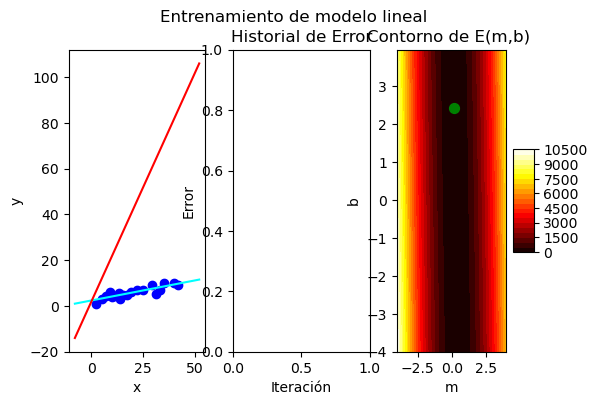

In [15]:
# Opciones de visualización
plt.ion()
#Fin opciones de visualización
plot_state=init_plot(x,y,optimal,m,b)
optimization_state= OptimizationState(max_iterations=max_iterations,error_history=[])


## Observaciones de modelado con datos sin normalizar.
La curva de error tiene diferentes escalas para cada parámetro, dificil encontrar el mínimo.

# Valores normalizados

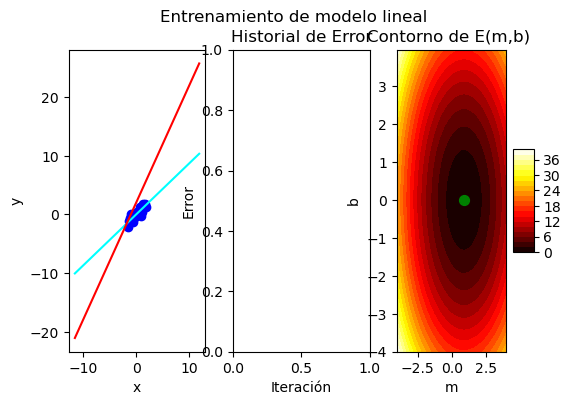

In [41]:
# Valores in normalizar y m, b =2

## *******  PARÁMETROS *******  ##########
# Parámetros iniciales del modelo (probar valores entre -5 y 5)
m= 2
b= 2
# normalizar
NORMALIZAR= 1
if (NORMALIZAR):
    x= (x - x.mean()) / x.std()
    y= (y - y.mean()) / y.std()

# Configuración del descenso de gradiente

#iteraciones máximas a realizar
max_iterations= 500
#minimo de tolerancia para el cambio del error entre iteraciones
tolerance=0.0000001
#velocidad de aprendizaje
#valores sensatos: entre 0.00001 y 0.001
alpha=0.0005
# velocidad de visualización
fps= 20
plot_jumps= 10
#fin Configuración

# Cálculo del valor óptimo mediante cuadrados mínimos
optimal=optimal_model(x,y)
# fin cálculo del valor óptimo mediante cuadrados mínimos

#%% Inicialización del algoritmo
iteration=0
mean_error_last=tolerance+1
mean_error=0
error_history=[]
# Fin inicialización del algoritmo

# Opciones de visualización
plt.ion()
#Fin opciones de visualización
plot_state=init_plot(x,y,optimal,m,b)
optimization_state= OptimizationState(max_iterations=max_iterations,error_history=[])


## Conclusion1: Con valores normalizados
Se observa una diferencia en el gráfico apareciendo una plano convexo, con un minimo global señalado. Además aparece el error centrado en 0.

# Cambio m = 0.2 y b = 2 (ejemplo pdf teoría)

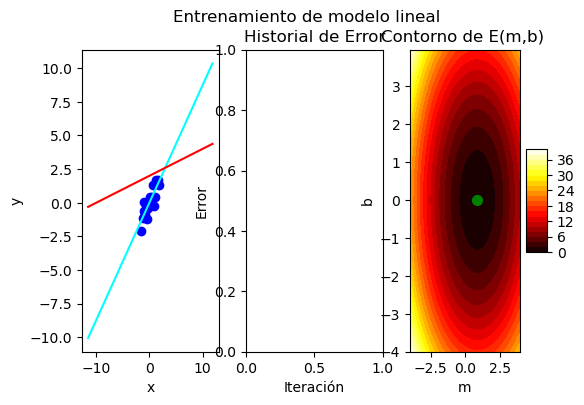

In [14]:
# Valores in normalizar y m, b =2

## *******  PARÁMETROS *******  ##########
# Parámetros iniciales del modelo (probar valores entre -5 y 5)
m= 0.2
b= 2
# nmalizar
NORMALIZAR= 1
if (NORMALIZAR):
    x= (x - x.mean()) / x.std()
    y= (y - y.mean()) / y.std()
# Configuración del descenso de gradiente

#iteraciones máximas a realizar
max_iterations= 500
#minimo de tolerancia para el cambio del error entre iteraciones
tolerance=0.0000001
#velocidad de aprendizaje
#valores sensatos: entre 0.00001 y 0.001
alpha=0.002
# velocidad de visualización
fps= 20
plot_jumps= 10
#fin Configuración

# Cálculo del valor óptimo mediante cuadrados mínimos
optimal=optimal_model(x,y)
# fin cálculo del valor óptimo mediante cuadrados mínimos

#%% Inicialización del algoritmo
iteration=0
mean_error_last=tolerance+1
mean_error=0
error_history=[]
# Fin inicialización del algoritmo

# Opciones de visualización
plt.ion()
#Fin opciones de visualización
plot_state=init_plot(x,y,optimal,m,b)
optimization_state= OptimizationState(max_iterations=max_iterations,error_history=[])


#  Cambio m = -0.2 y b = 8 (ejemplo pdf teoría)

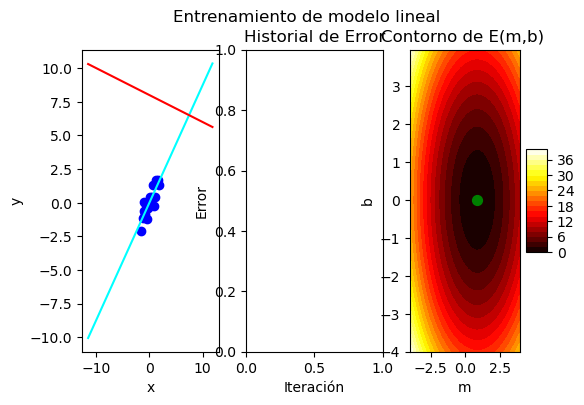

In [24]:
# Valores in normalizar y m, b =2

## *******  PARÁMETROS *******  ##########
# Parámetros iniciales del modelo (probar valores entre -5 y 5)
m= -0.2
b= 8
# nmalizar
NORMALIZAR= 1
if (NORMALIZAR):
    x= (x - x.mean()) / x.std()
    y= (y - y.mean()) / y.std()
# Configuración del descenso de gradiente

#iteraciones máximas a realizar
max_iterations= 500
#minimo de tolerancia para el cambio del error entre iteraciones
tolerance=0.0000001
#velocidad de aprendizaje
#valores sensatos: entre 0.00001 y 0.001
alpha=0.002
# velocidad de visualización
fps= 20
plot_jumps= 10
#fin Configuración

# Cálculo del valor óptimo mediante cuadrados mínimos
optimal=optimal_model(x,y)
# fin cálculo del valor óptimo mediante cuadrados mínimos

#%% Inicialización del algoritmo
iteration=0
mean_error_last=tolerance+1
mean_error=0
error_history=[]
# Fin inicialización del algoritmo

# Opciones de visualización
plt.ion()
#Fin opciones de visualización
plot_state=init_plot(x,y,optimal,m,b)
optimization_state= OptimizationState(max_iterations=max_iterations,error_history=[])
